In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime, date, timedelta
import warnings
warnings.filterwarnings('ignore')


In [20]:
df=pd.read_excel(r"C:\Users\USER\Desktop\DATA  SCIENCE\Excel Workbooks Tsi\time_series_dataset.xlsx")

In [21]:
df.head(10)

date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
0 2009-01-01      36.0                  31.0        -10.0         -18653.0   
1 2009-01-02      40.0                   NaN         -2.0              NaN   
2 2009-01-03      32.0                   4.0          NaN         -21528.0   
3 2009-01-04      39.0                 -43.0         -5.0          -3510.0   
4 2009-01-05      13.0                  24.0         -2.0         -13209.0   
5 2009-01-06       0.0                  -9.0         -3.0          -1149.0   
6 2009-01-07      27.0                   7.0         -7.0         -10305.0   
7 2009-01-08      22.0                 -38.0          6.0         -25855.0   
8 2009-01-09      43.0                  -1.0         -5.0           2122.0   
9 2009-01-10      23.0                 -33.0          1.0         -20660.0   

   river_hydrometry  
0               NaN  
1               2.0  
2               5.0  
3               3.0  
4               2.0  
5               4.0  
6               2.0  
7               2.0  
8               3.0  
9               5.0

In [22]:
df.isnull().sum()

date                     0
rainfall                17
depth_to_groundwater    20
temperature             21
drainage_volume         14
river_hydrometry        15
dtype: int64

In [23]:
df.shape

(5222, 6)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5222 entries, 0 to 5221
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5222 non-null   datetime64[ns]
 1   rainfall              5205 non-null   float64       
 2   depth_to_groundwater  5202 non-null   float64       
 3   temperature           5201 non-null   float64       
 4   drainage_volume       5208 non-null   float64       
 5   river_hydrometry      5207 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 244.9 KB


In [25]:
df['date'] = pd.to_datetime(df.date, format = '%d/%m/%Y')

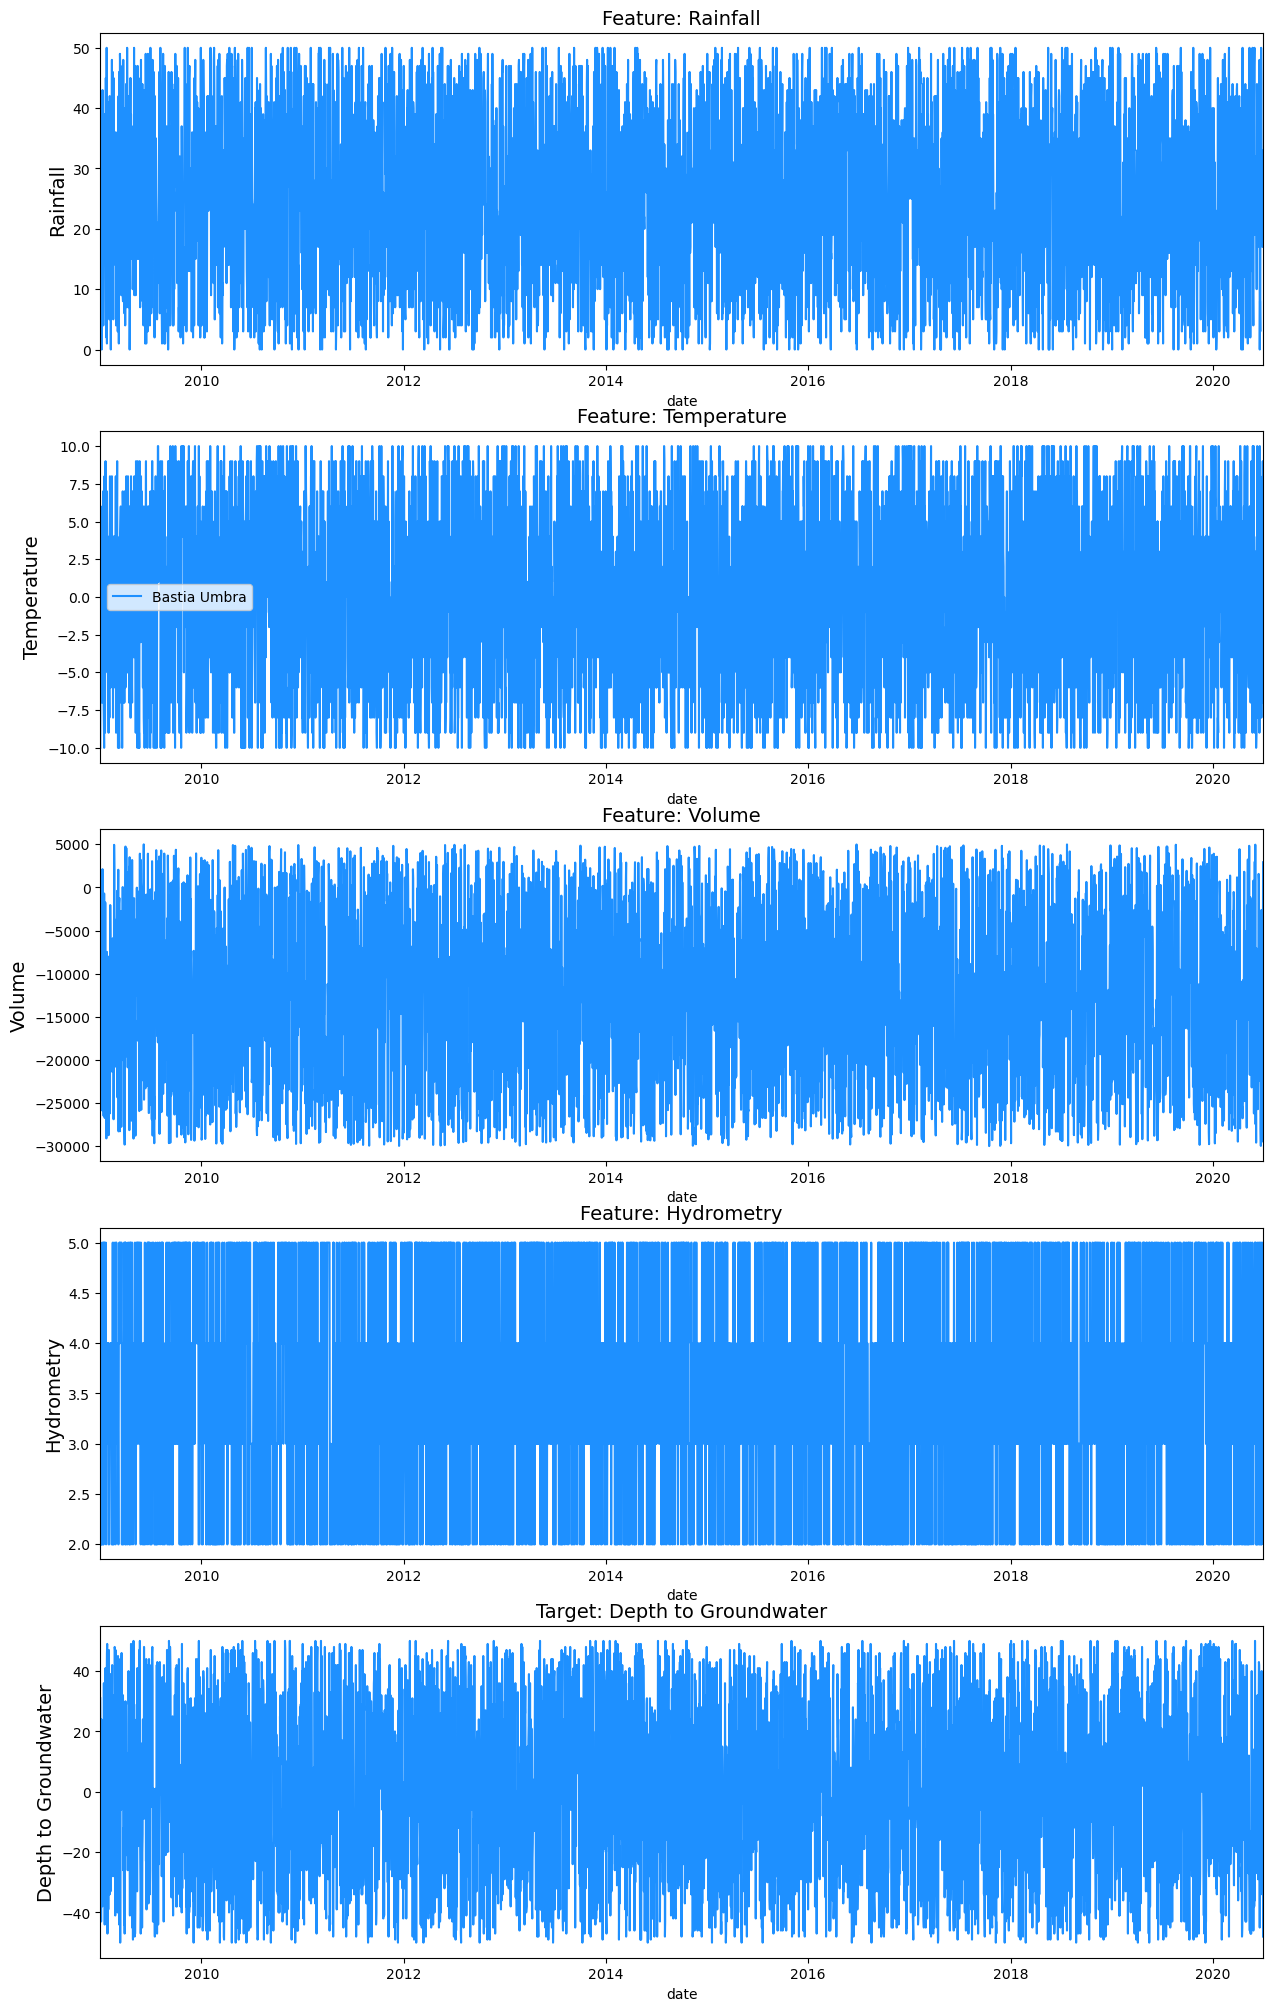

In [26]:
from datetime import datetime, date
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=df.date, y=df.rainfall.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)


sns.lineplot(x=df.date, y=df.temperature.fillna(np.inf), ax=ax[1], color='dodgerblue',label='Bastia Umbra')
ax[1].set_title('Feature: Temperature', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)


sns.lineplot(x=df.date, y=df.drainage_volume.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Volume', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)


sns.lineplot(x=df.date, y=df.river_hydrometry.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: Hydrometry', fontsize=14)
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)


sns.lineplot(x=df.date, y=df.depth_to_groundwater.fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: Depth to Groundwater', fontsize=14)
ax[4].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(5):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

In [9]:
# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='date')

# Check time intervals
df['Time_Interval'] = df.date - df.date.shift(1)

df[['date', 'Time_Interval']].head(10)

date Time_Interval
0 2009-01-01           NaT
1 2009-01-02        1 days
2 2009-01-03        1 days
3 2009-01-04        1 days
4 2009-01-05        1 days
5 2009-01-06        1 days
6 2009-01-07        1 days
7 2009-01-08        1 days
8 2009-01-09        1 days
9 2009-01-10        1 days

In [27]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

KeyError: 'Time_Interval'

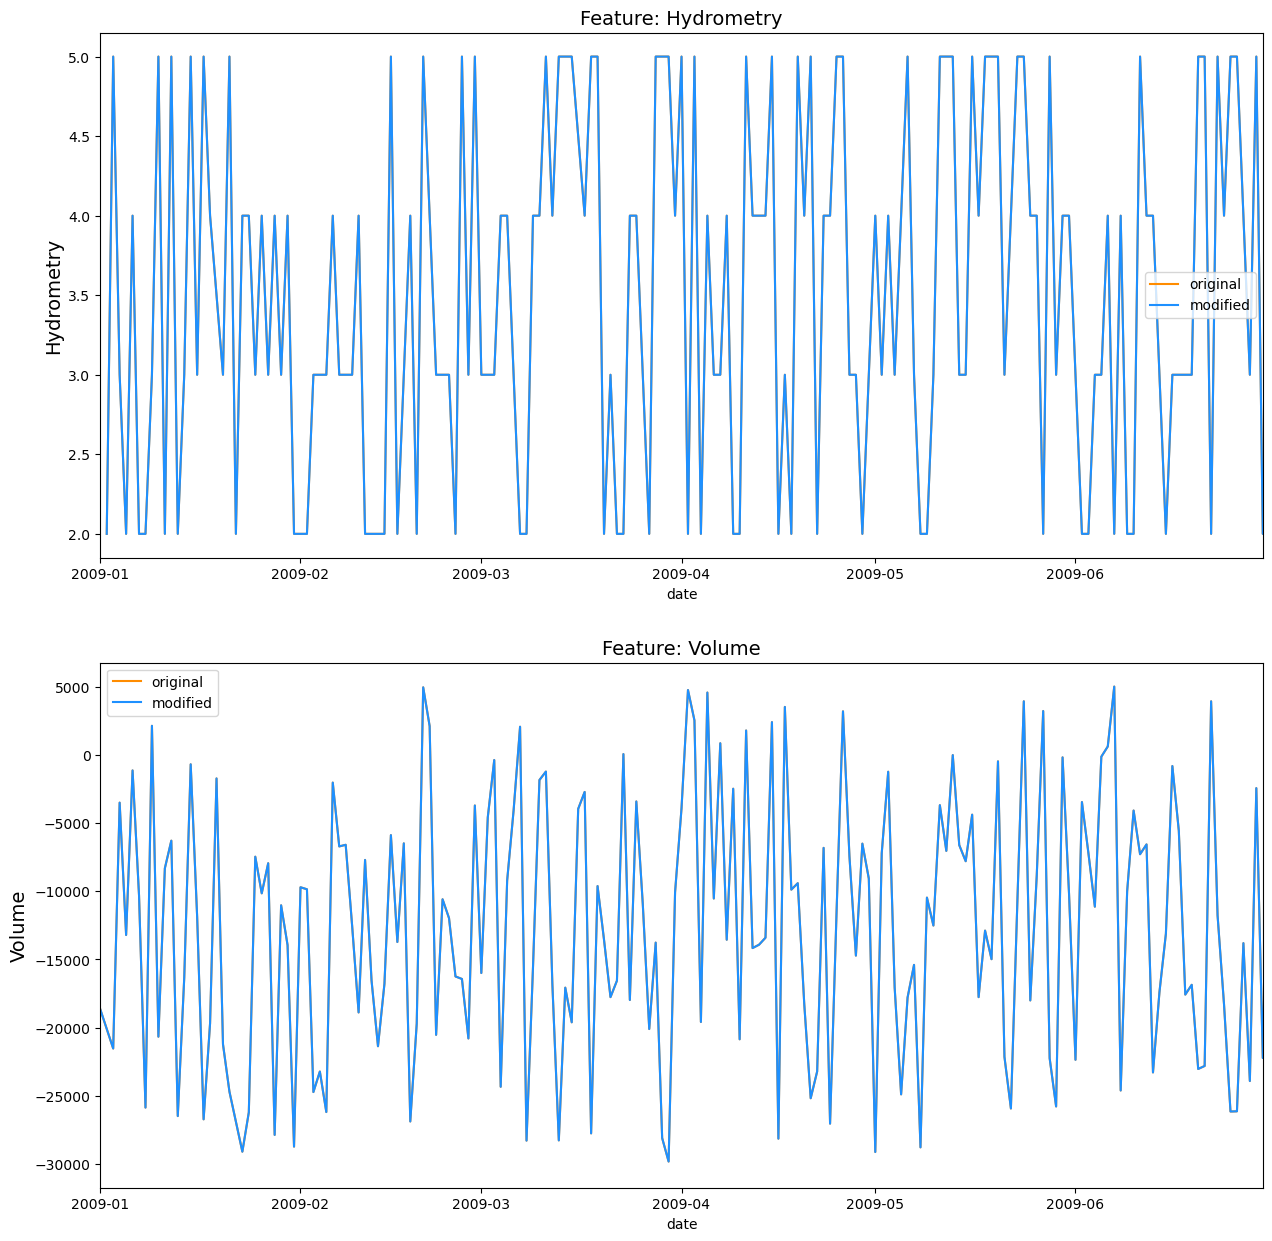

In [28]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old = df.river_hydrometry.copy()
df['river_hydrometry'] = np.where((df.river_hydrometry == 0),np.nan, df.river_hydrometry)

sns.lineplot(x=df.date, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=df.date, y=df.river_hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old = df.drainage_volume.copy()
df['drainage_volume'] = np.where((df.drainage_volume == 0),np.nan, df.drainage_volume)

sns.lineplot(x=df.date, y=old.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=df.date, y=df.drainage_volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)


for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2009, 6, 30)])

plt.show()

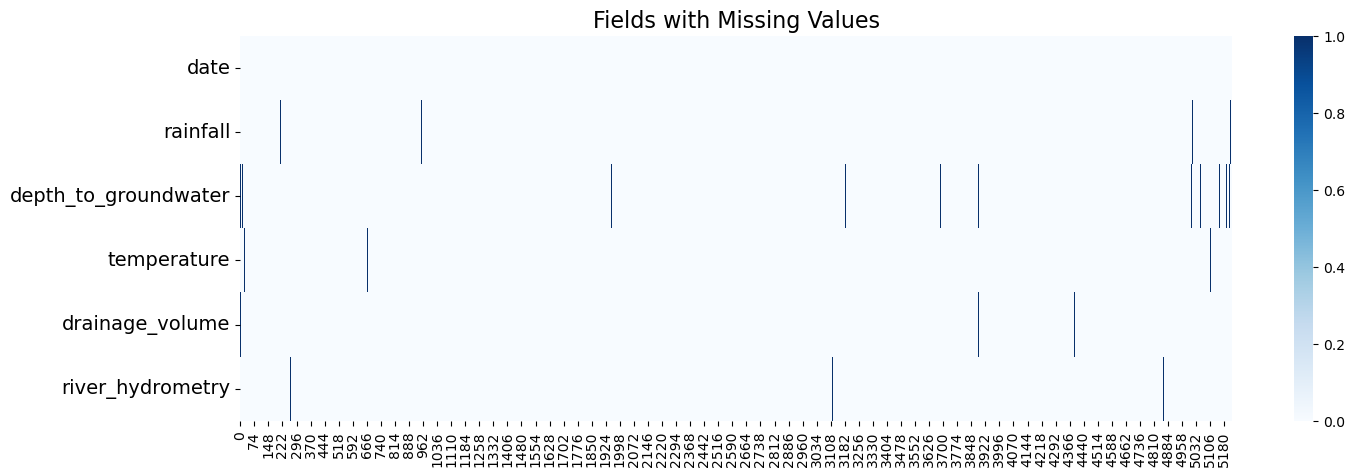

In [29]:
#Getting to see the actual fields with missing data
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

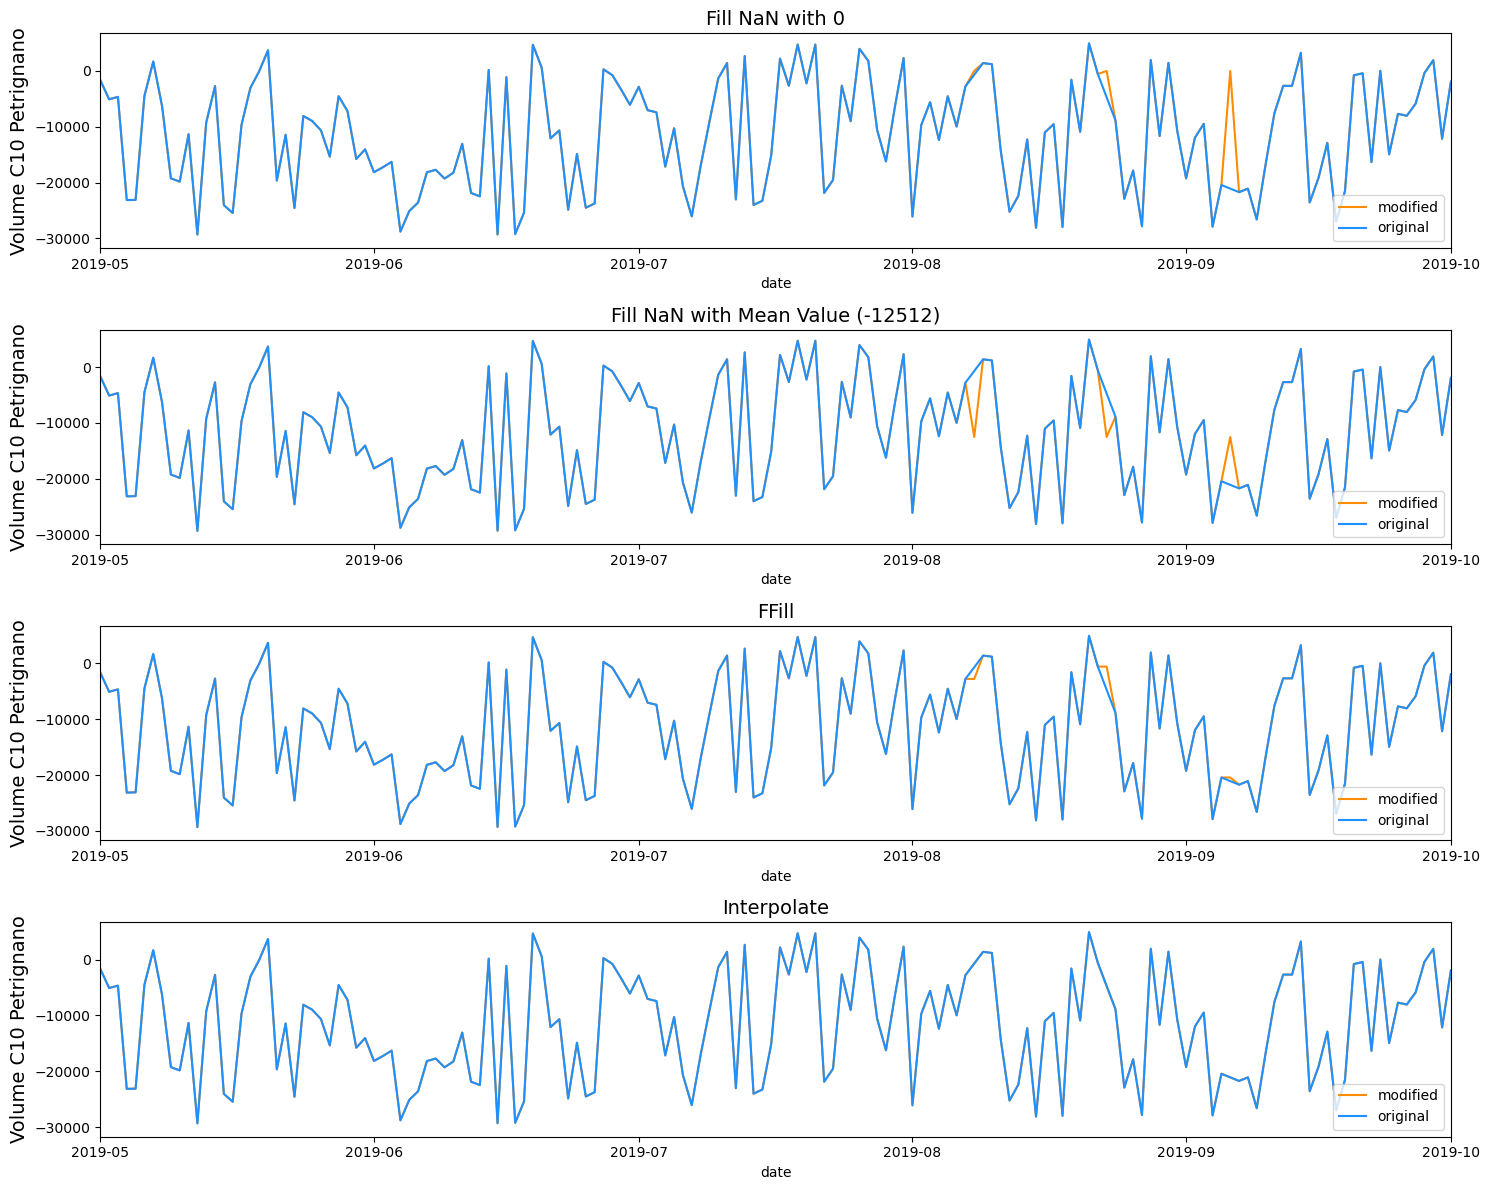

In [31]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.date, y=df.drainage_volume.fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df.date, y=df.drainage_volume.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_val = df.drainage_volume.mean()
sns.lineplot(x=df.date, y=df.drainage_volume.fillna(mean_val), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df.date, y=df.drainage_volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df.date, y=df.drainage_volume.ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df.date, y=df.drainage_volume.fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df.date, y=df.drainage_volume.interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df.date, y=df.drainage_volume.fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
plt.tight_layout()
plt.show()

In [14]:
#Read on Polynomial Expansion and lagrange Formula

In [33]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

In [16]:
Option 1: Fill NaN with Outlier or Zero

In this specific example filling the missing value with an outlier value such as -999 is not a good idea. However, many notebooks in this challenge have been using -999.

Option 2: Fill NaN with Mean Value

Also in this example, we can see that filling NaNs with the mean value is also not sufficient.

Option 3: Fill NaN with Last Value with .ffill()

Filling NaNs with the last value is already a little bit better in this case.

Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()

Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring values.

SyntaxError: invalid syntax (150041713.py, line 1)

Resampling in time series analysis is an essential technique that involves changing the frequency of the data observations. This process can either involve increasing the frequency (upsampling) or decreasing it (downsampling). The importance of resampling in time series analysis can be attributed to several reasons:

Regularization of Data: Time series data may be irregular, with observations occurring at different time intervals. Resampling allows you to regularize the data, making it consistent by aligning observations at uniform intervals. This regularization simplifies analysis and modeling processes.

Alignment with Other Data: When dealing with multiple time series or integrating time series data with other datasets, it's crucial to ensure that the observations are aligned. Resampling allows you to synchronize time series data, facilitating meaningful comparisons and joint analyses.

Feature Engineering: Resampling is often used in feature engineering to create new features or aggregate existing ones. For example, you might resample daily data to monthly data and calculate statistics (mean, sum, etc.) for each month. This process helps in summarizing trends and patterns at different time granularities.

Modeling Flexibility: Some time series models may require data to be at a specific frequency. Resampling enables you to adapt your data to meet the requirements of the chosen modeling technique. This can be particularly important when working with machine learning models that have specific input requirements.

Missing Value Handling: Resampling can also be used to handle missing values in time series data. By filling in or interpolating missing values, you can create a more complete dataset for analysis. The interpolation methods used during resampling depend on the nature of the data and the goals of the analysis.

Noise Reduction: Resampling can be used to smooth out noisy time series data. Aggregating data over longer time periods (e.g., averaging over hours instead of minutes) can help reduce short-term fluctuations and highlight more prominent trends.

Easier Visualization: Regularizing the time series data through resampling makes it easier to visualize and interpret. Plots become more readable, and trends are often clearer when the data is presented at a consistent frequency.

In summary, resampling plays a crucial role in preparing time series data for analysis and modeling. It provides flexibility, alignment, and regularization, making the data more suitable for various analytical techniques and ensuring that insights drawn from the analysis are meaningful and accurate.



In [ ]:
Resampling can provide additional information on the data. There are two types of resampling:

Upsampling is when the frequency of samples is increased (e.g. days to hours)
Downsampling is when the frequency of samples is decreased (e.g. days to weeks)
In this example, we will do some downsampling with the .resample() function.

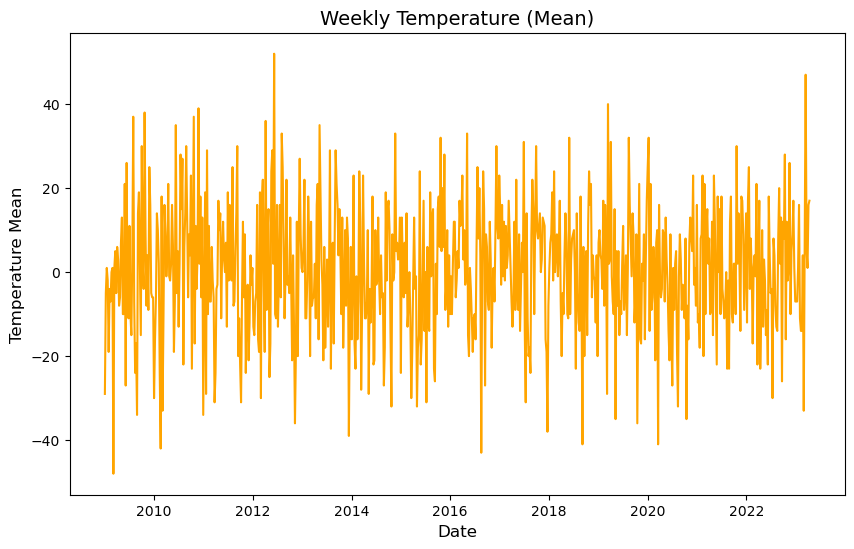

In [34]:
# Resample by 7 days and calculate the sum of weekly temperature
resampled_df = df[['date', 'temperature']].resample('7D', on='date').sum().reset_index(drop=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='temperature', data=resampled_df, color='orange')
plt.title('Weekly Temperature (Mean)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature Mean', fontsize=12)
plt.show()

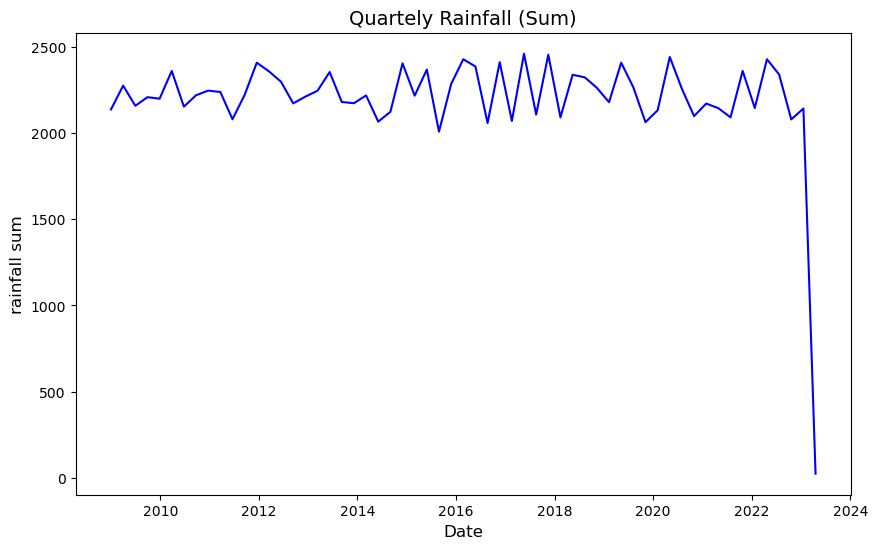

In [35]:
# Resample based on Quarters for Rainfall 
resampled_df = df[['date', 'rainfall']].resample('90D', on='date').sum().reset_index(drop=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='rainfall', data=resampled_df, color='blue')
plt.title('Quartely Rainfall (Sum)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('rainfall sum', fontsize=12)
plt.show()

STATIONARITY

 STATIONARITY

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

constant mean and mean is not time-dependent
constant variance and variance is not time-dependent
constant covariance and covariance is not time-dependent
If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or season
ality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

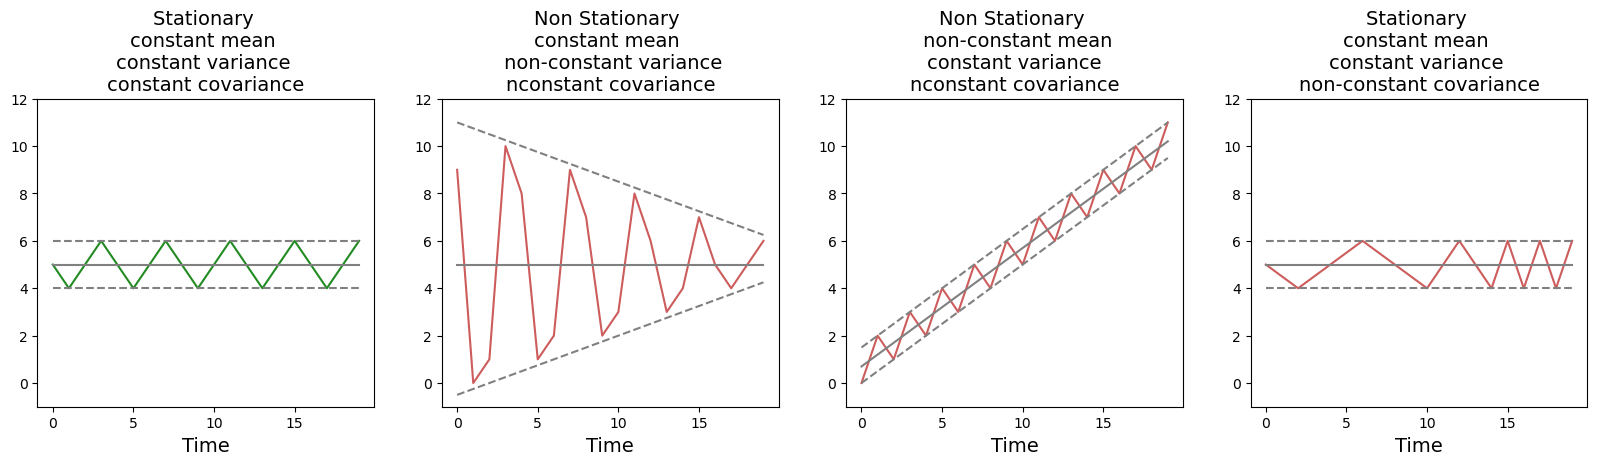

In [36]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

The check for stationarity can be done via three different approaches:

visually: plot time series and check for trends or seasonality
basic statistics: split time series and compare the mean and variance of each partition
statistical test: Augmented Dickey Fuller test
Let's do the visual check first. We can see that all features except Temperature have non-constant mean and non-constant variance. Therefore, none of these seem to be stationary. However, Temperature shows strong seasonality (hot in summer, cold in winter) and therefore it is not stationary either.

Checking For Stationarity on Rolling Windows

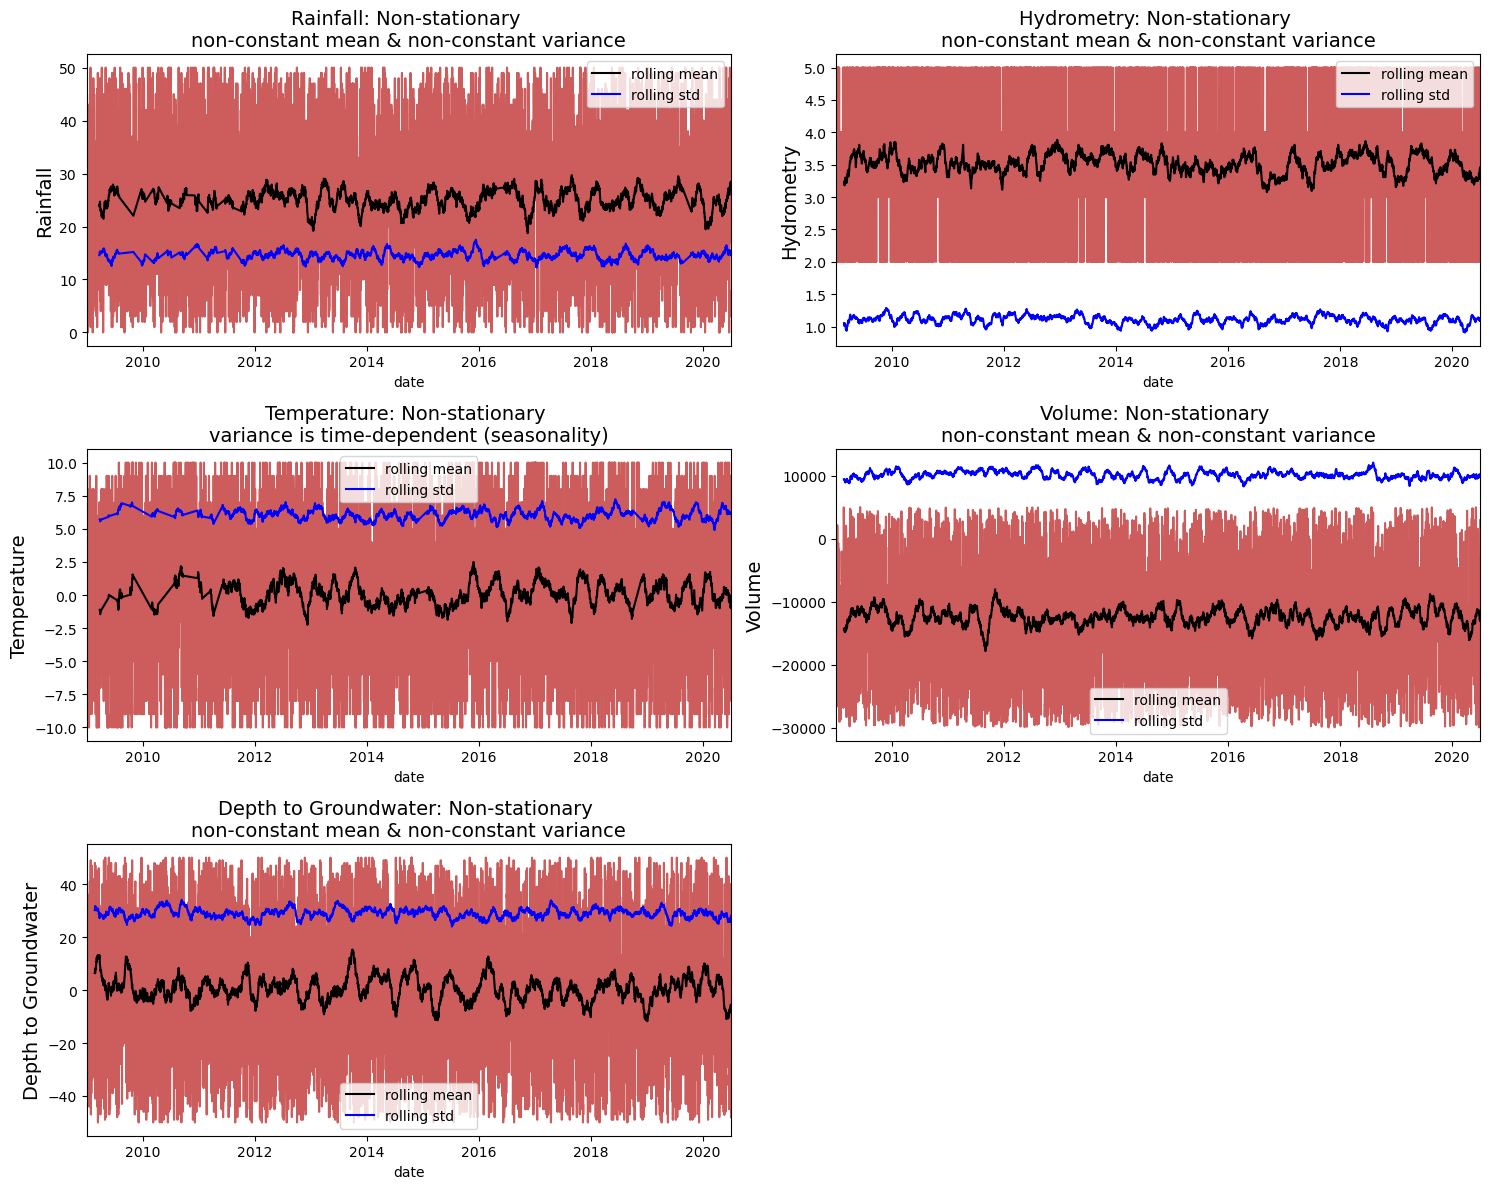

In [37]:
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

sns.lineplot(x=df.date, y=df.rainfall, ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.date, y=df.rainfall.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.date, y=df.rainfall.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.lineplot(x=df.date, y=df.temperature, ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.date, y=df.temperature.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.date, y=df.temperature.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df.date, y=df.river_hydrometry, ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.date, y=df.river_hydrometry.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.date, y=df.river_hydrometry.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.date, y=df.drainage_volume, ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.date, y=df.drainage_volume.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.date, y=df.drainage_volume.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.date, y=df.depth_to_groundwater, ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.date, y=df.depth_to_groundwater.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.date, y=df.depth_to_groundwater.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(3):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i,1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

Next, we will check the underlying statistics. For this we will split the time series into two sections and check the mean and the variance. You could do more partitions if you wanted.

With this method, Temperature and River_Hydrometry show somewhat similar (constant) mean and variance and could be seen as stationary. However, with this method, we are not able to see the seasonality in the Temperature feature.

Stationarity By Splitting

In [39]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

numeric_column_name = ['rainfall','temperature','river_hydrometry','drainage_volume','depth_to_groundwater']  # Replace with the actual name of your numeric column
numeric_column = df[numeric_column_name]

# Calculate mean and variance for the first partition
partition1_mean = numeric_column.head(partition_length).mean()
partition1_var = numeric_column.head(partition_length).var()

# Calculate mean and variance for the second partition
partition2_mean = numeric_column.tail(partition_length).mean()
partition2_var = numeric_column.tail(partition_length).var()

# Add the 'Date' column back to the DataFrame if needed
result_df = pd.DataFrame({
    'Partition Mean 1': [partition1_mean],
    'Partition Variance 1': [partition1_var],
    'Partition Mean 2': [partition2_mean],
    'Partition Variance 2': [partition2_var]
})

# Display or use the result_df as needed
result_df.head()

Partition Mean 1  \
0  rainfall                   24.860716
temperatu...   

                                Partition Variance 1  \
0  rainfall                2.157350e+02
temperatu...   

                                    Partition Mean 2  \
0  rainfall                   24.988872
temperatu...   

                                Partition Variance 2  
0  rainfall                2.124118e+02
temperatu...

In [ ]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition 1 Mean'] == temp['Partition 2 Mean'])
    m2 = (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    m3 = (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3)
    m4 = (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Partition 1 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Mean'])

    df1['Partition 1 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Variance'])

    return df1


stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")

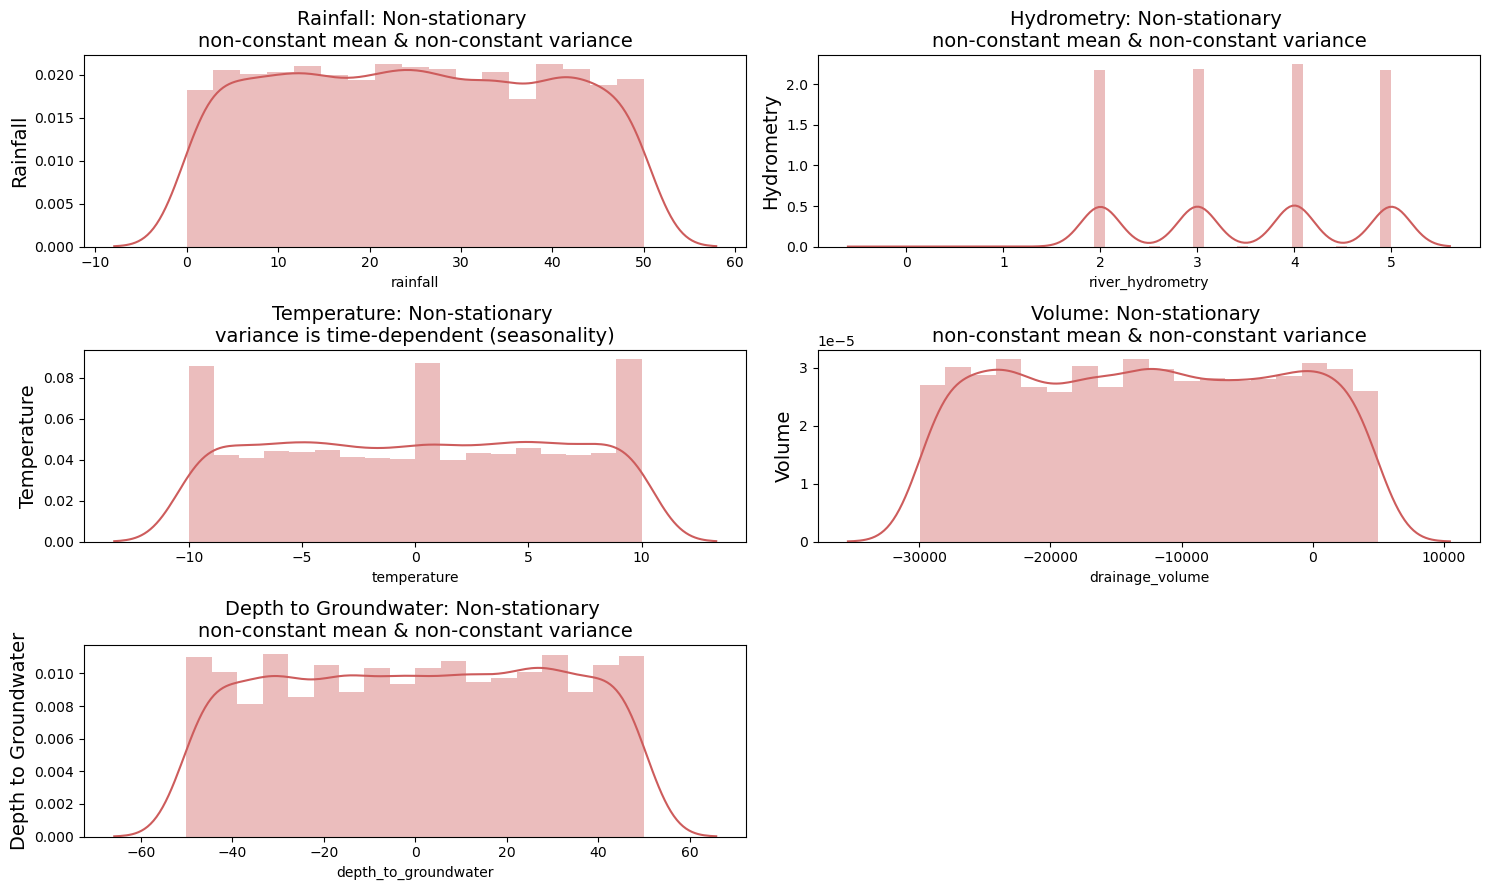

In [40]:
import warnings as ws
ws.filterwarnings('ignore')
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

rainfall_mean = df['rainfall'].mean()
sns.distplot(df.rainfall.fillna(rainfall_mean), ax=ax[0, 0], color='indianred')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.distplot(df.temperature.fillna(0), ax=ax[1, 0], color='indianred')
ax[1, 0].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature', fontsize=14)

sns.distplot(df.river_hydrometry.fillna(0), ax=ax[0, 1], color='indianred')
ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.distplot(df.drainage_volume.fillna(0), ax=ax[1, 1], color='indianred')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.distplot(df.depth_to_groundwater.fillna(0), ax=ax[2, 0], color='indianred')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0):Time series is NOT stationary(Time series has a unit root.).

Alternate Hypothesis (H1):Time series is stationary(Time series has no unit root).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [41]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.depth_to_groundwater.values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

Read For Interviews

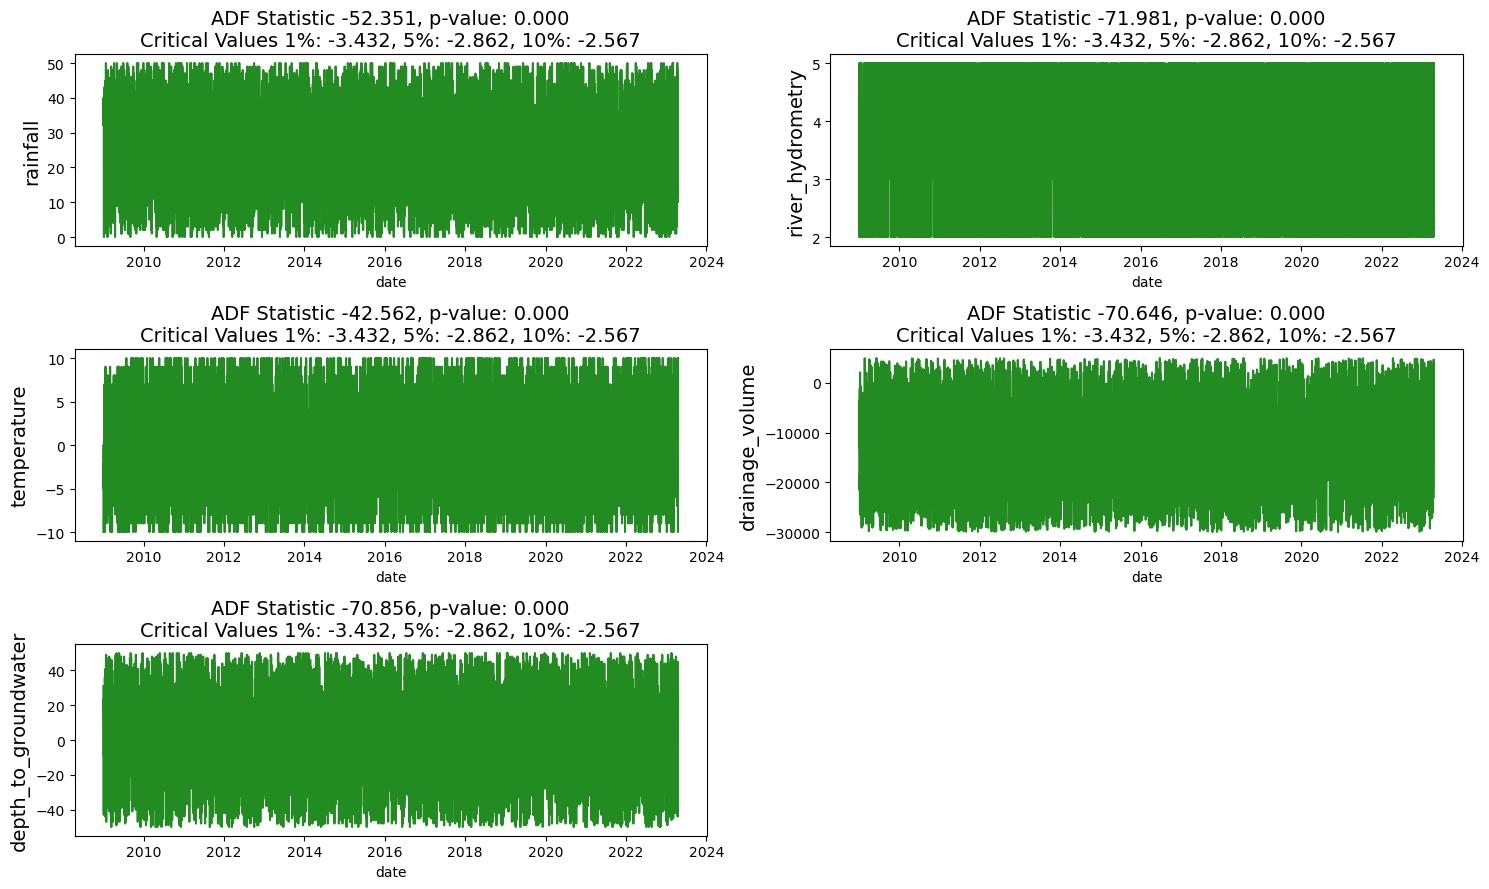

In [42]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

   
columns_to_fill = ['rainfall', 'temperature', 'river_hydrometry', 'drainage_volume', 'depth_to_groundwater']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

visualize_adfuller_results(df.rainfall.values, 'rainfall', ax[0, 0])
visualize_adfuller_results(df.temperature.values, 'temperature', ax[1, 0])
visualize_adfuller_results(df.river_hydrometry.values, 'river_hydrometry', ax[0, 1])
visualize_adfuller_results(df.drainage_volume.values, 'drainage_volume', ax[1, 1])
visualize_adfuller_results(df.depth_to_groundwater.values, 'depth_to_groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model that requires with characteristic, the data has to be transformed. However, if the data is not stationary to begin with, we should rethink the choice of model.

The two most common methods to achieve stationarity are:

Transformation: e.g. log or square root to stabilize non-constant variance
Differencing: subtracts the current value from the previous
If the data is not stationary but we want to use a model that requires with characteristic, the data has to be transformed. However, if the data is not stationary to begin with, we should rethink the choice of model.

The two most common methods to achieve stationarity are:

Transformation: e.g. log or square root to stabilize non-constant variance
Differencing: subtracts the current value from the previous

Differencing can be done in different orders:

First order differencing: linear trends with  zi=yi−yi−1
 
Second-order differencing: quadratic trends with  zi=(yi−yi−1)−(yi−1−yi−2)
 
and so on...

In [ ]:
# Log Transform of absolute values
# # (Log transoform of negative values will return NaN)
# df['Depth_to_Groundwater_log'] = np.log(abs(df.Depth_to_Groundwater))


# f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
# visualize_adfuller_results(abs(df.Depth_to_Groundwater), 'Absolute \n Depth to Groundwater', ax[0, 0])

# sns.distplot(df.Depth_to_Groundwater_log, ax=ax[0, 1])
# visualize_adfuller_results(df.Depth_to_Groundwater_log, 'Transformed \n Depth to Groundwater', ax[1, 0])

# sns.distplot(df.Depth_to_Groundwater_log, ax=ax[1, 1])

# plt.tight_layout()
# plt.show()
#The differencing can be reverted if the the first value before differencing is known. In this case, we can accumulate all values with the f#unction .cumsum() and add the first value of the original time series.

#df.Depth_to_Groundwater.equals(df.Depth_to_Groundwater_diff_1.cumsum() + df.Depth_to_Groundwater.iloc[0])

Feature Engineering And Time Series Analysis

In [43]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).isocalendar().week
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df.month%12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head(10)

date  year  month  day  day_of_year  week_of_year  quarter  season
0 2009-01-01  2009      1    1            1          <NA>        1       1
1 2009-01-02  2009      1    2            2          <NA>        1       1
2 2009-01-03  2009      1    3            3          <NA>        1       1
3 2009-01-04  2009      1    4            4          <NA>        1       1
4 2009-01-05  2009      1    5            5          <NA>        1       1
5 2009-01-06  2009      1    6            6          <NA>        1       1
6 2009-01-07  2009      1    7            7          <NA>        1       1
7 2009-01-08  2009      1    8            8          <NA>        1       1
8 2009-01-09  2009      1    9            9          <NA>        1       1
9 2009-01-10  2009      1   10           10          <NA>        1       1

Encoding Cyclical Features
The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

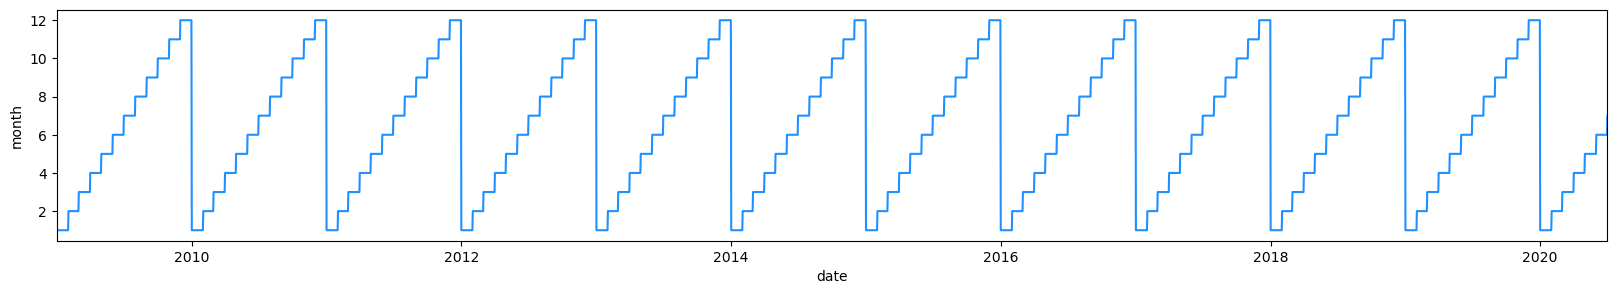

In [44]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.date, y=df.month, color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

Ideally, we want the underlying data to represent the same difference between two consecutive months, even between December and January. A common remedy for this issue is to encode cyclical features into two dimensions with sine and cosine transformation.

In [45]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df.month/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df.month/month_in_year)

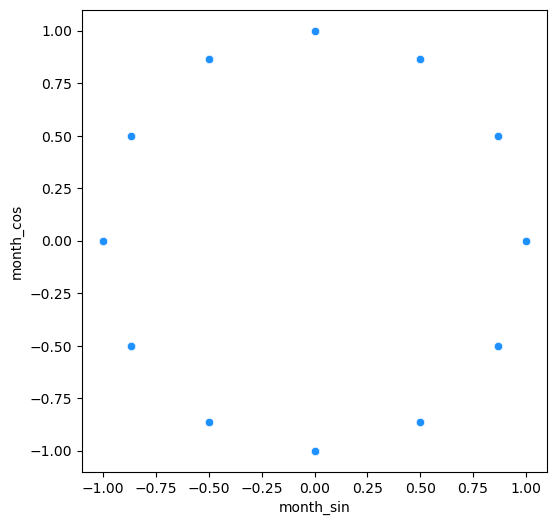

In [46]:
days_in_month = 30
df['day_sin'] = np.sin(2*np.pi*df.day/days_in_month)
df['day_cos'] = np.cos(2*np.pi*df.day/days_in_month)

days_in_year = 365
df['day_of_year_sin'] = np.sin(2*np.pi*df.day_of_year/days_in_year)
df['day_of_year_cos'] = np.cos(2*np.pi*df.day_of_year/days_in_year)

weeks_in_year = 52.1429
df['week_of_year_sin'] = np.sin(2*np.pi*df.week_of_year/weeks_in_year)
df['week_of_year_cos'] = np.cos(2*np.pi*df.week_of_year/weeks_in_year)

quarters_in_year = 4
df['quarter_sin'] = np.sin(2*np.pi*df.quarter/quarters_in_year)
df['quarter_cos'] = np.cos(2*np.pi*df.quarter/quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df.season/seasons_in_year)
df['season_cos'] = np.cos(2*np.pi*df.season/seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

Decomposition


The characteristics of a time series are;

Trend and Level
Seasonality
Random / Noise
We can use the function seasonal_decompose() from the statsmodels library.

Additive:  y(t)=Level+Trend+Seasonality+Noise.....
 
Multiplicative:  y(t)=Level∗Trend∗Seasonality∗Noise...

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['rainfall', 'temperature', 
                   'drainage_volume', 
                   'river_hydrometry', 'depth_to_groundwater']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], period=52, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

Additive Model:

When the trend and seasonality components are relatively constant across time: Use an additive model when the variations in the time series are consistent over time, and the amplitude of the seasonality does not depend on the level of the time series.
Linear relationships: An additive model assumes that the components are added together, which is suitable when the contribution of each component is consistent regardless of the level of the time series.
Mathematically: Y(t)=Level+Trend+Seasonality+Noise

Multiplicative Model:

When the trend and seasonality components vary with the level of the time series: Use a multiplicative model when the amplitude of seasonality or the impact of the trend increases or decreases with the level of the time series.
Non-linear relationships: A multiplicative model assumes that the components are multiplied together, which is appropriate when the interaction between the components is non-linear.
Mathematically: Y(t)=Level×Trend×Seasonality×Noise

In practice, the choice between additive and multiplicative models often involves visual inspection of the time series data. If the amplitude of seasonality and the impact of the trend seem to increase with the level of the time series, a multiplicative model might be more appropriate. If the variations appear to be more consistent, an additive model may be suitable.

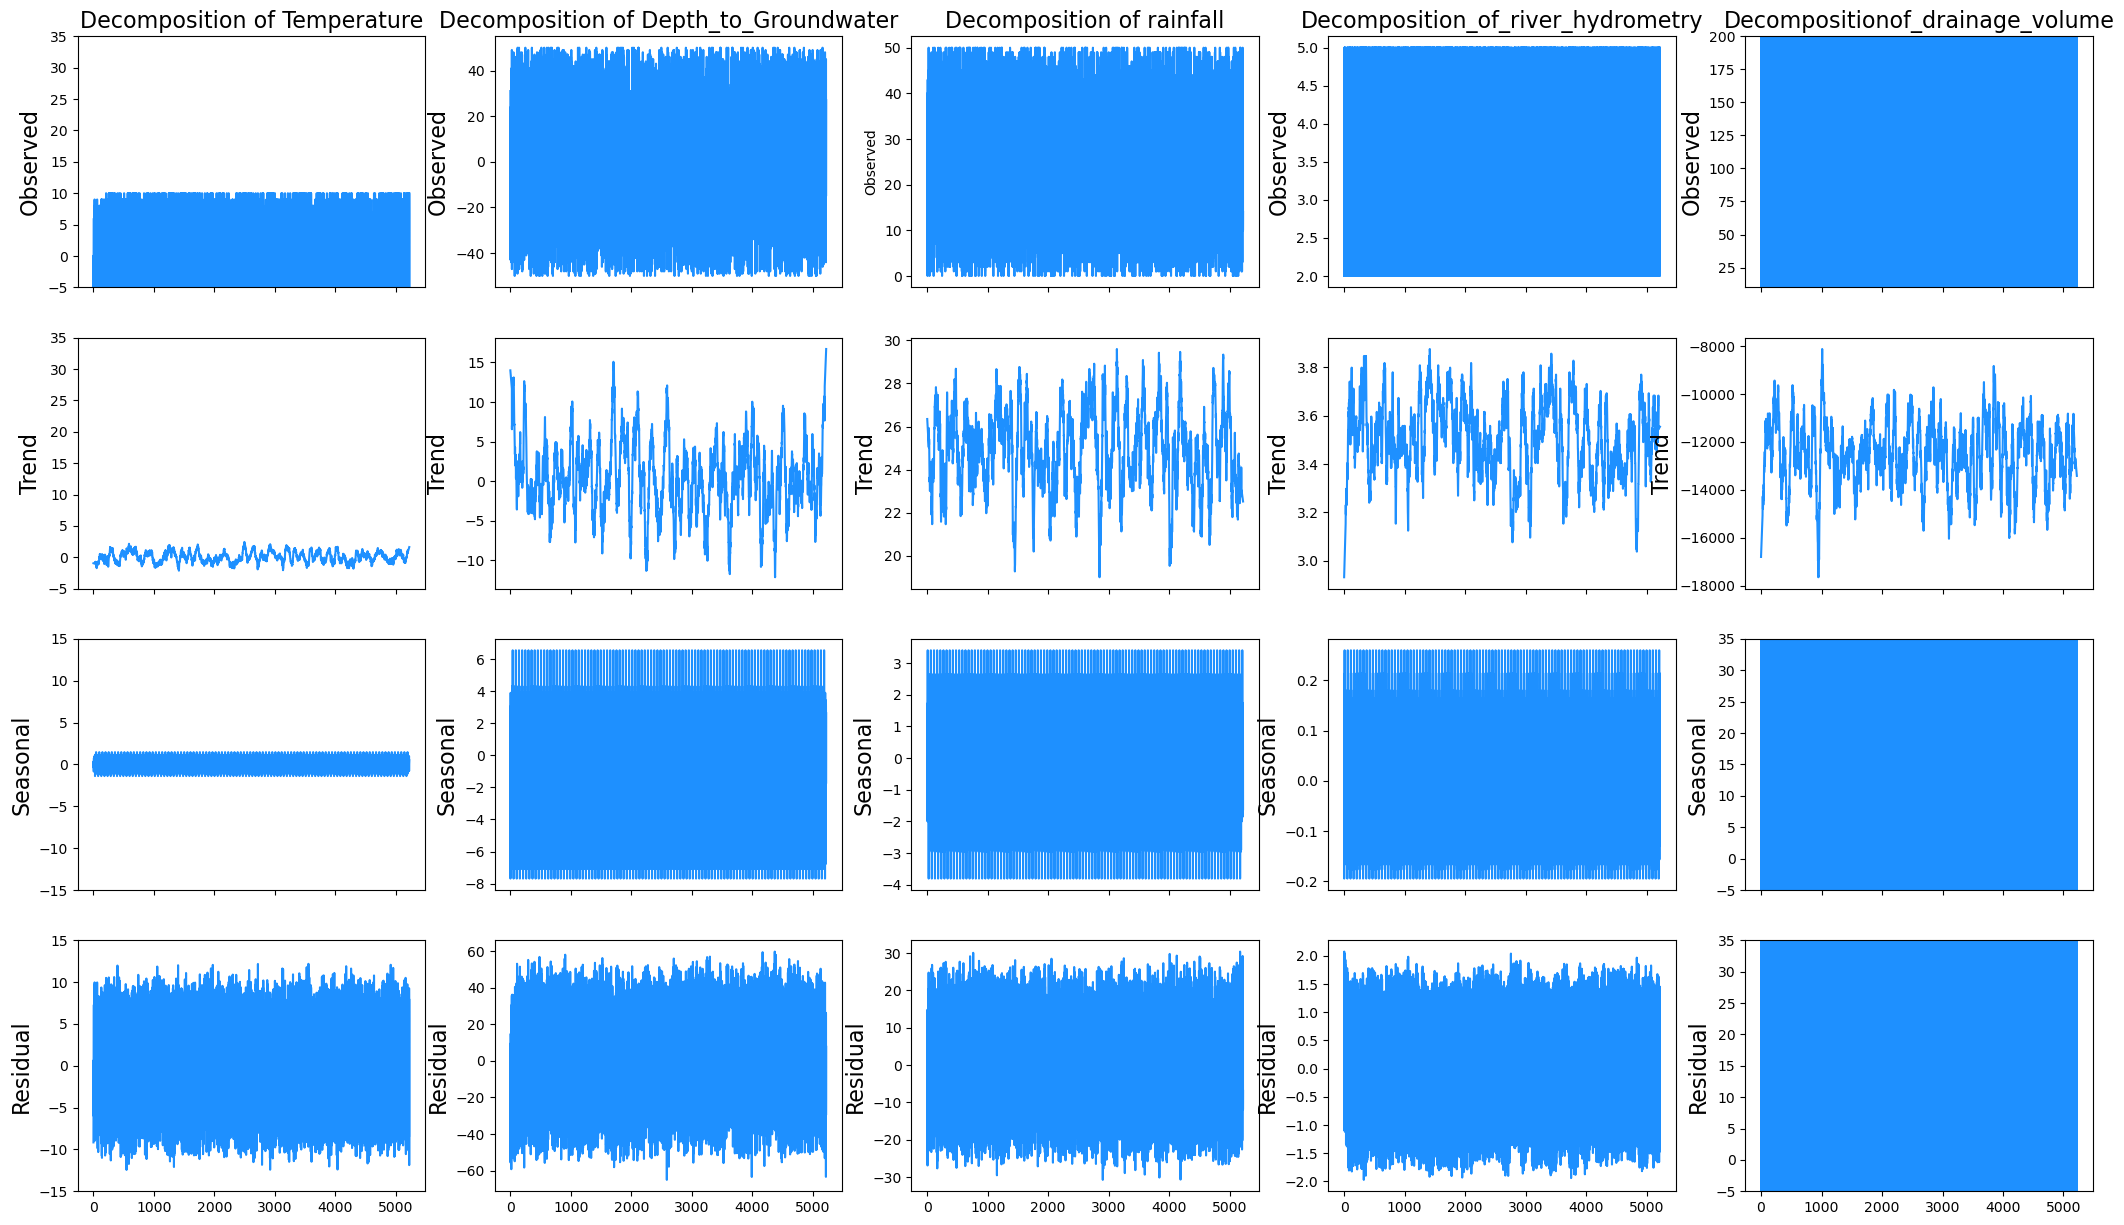

In [48]:
fig, ax = plt.subplots(ncols=5, nrows=4, sharex=True, figsize=(26,15))
res = seasonal_decompose(df.temperature, period=52, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Temperature', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=16)
ax[0,0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=16)
ax[1,0].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=16)
ax[2,0].set_ylim([-15, 15])

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=16)
ax[3,0].set_ylim([-15, 15])

ax[0,1].set_title('Decomposition of Depth_to_Groundwater', fontsize=16)
res = seasonal_decompose(df.depth_to_groundwater, period=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=16)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=16)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=16)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=16)

ax[0,2].set_title('Decomposition of rainfall', fontsize=16)
res = seasonal_decompose(df.rainfall, period=52, model='additive', extrapolate_trend='freq')
res.observed.plot(ax=ax[0,2], legend=False, color='dodgerblue')
ax[0, 2].set_ylabel('Observed', fontsize=10)

res.trend.plot(ax=ax[1,2], legend=False, color='dodgerblue')
ax[1, 2].set_ylabel('Trend', fontsize=16)

res.seasonal.plot(ax=ax[2,2], legend=False, color='dodgerblue')
ax[2, 2].set_ylabel('Seasonal', fontsize=16)

res.resid.plot(ax=ax[3, 2], legend=False, color='dodgerblue')
ax[3, 2].set_ylabel('Residual', fontsize=16)

ax[0,3].set_title('Decomposition_of_river_hydrometry', fontsize=16)
res = seasonal_decompose(df.river_hydrometry, period=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 3], legend=False, color='dodgerblue')
ax[0, 3].set_ylabel('Observed', fontsize=16)

res.trend.plot(ax=ax[1, 3], legend=False, color='dodgerblue')
ax[1, 3].set_ylabel('Trend', fontsize=16)

res.seasonal.plot(ax=ax[2, 3], legend=False, color='dodgerblue')
ax[2, 3].set_ylabel('Seasonal', fontsize=16)

res.resid.plot(ax=ax[3, 3], legend=False, color='dodgerblue')
ax[3, 3].set_ylabel('Residual', fontsize=16)


ax[0,4].set_title('Decompositionof_drainage_volume', fontsize=16)
res = seasonal_decompose(df.drainage_volume, period=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 4], legend=False, color='dodgerblue')
ax[0, 4].set_ylabel('Observed', fontsize=16)
ax[0,4].set_ylim([10, 200])

res.trend.plot(ax=ax[1, 4], legend=False, color='dodgerblue')
ax[1, 4].set_ylabel('Trend', fontsize=16)
ax[2,4].set_ylim([-5, 1])

res.seasonal.plot(ax=ax[2, 4], legend=False, color='dodgerblue')
ax[2, 4].set_ylabel('Seasonal', fontsize=16)
ax[2,4].set_ylim([-5, 35])

res.resid.plot(ax=ax[3, 4], legend=False, color='dodgerblue')
ax[3, 4].set_ylabel('Residual', fontsize=16)
ax[3,4].set_ylim([-5, 35])
plt.show()

In [49]:
df[['rainfall', 'rainfall_trend', 'rainfall_seasonal',
          'temperature', 'temperature_trend', 'temperature_seasonal',
          'drainage_volume', 'drainage_volume_trend', 'drainage_volume_seasonal',
          'river_hydrometry', 'river_hydrometry_trend', 'river_hydrometry_seasonal',
          'depth_to_groundwater', 'depth_to_groundwater_trend', 'depth_to_groundwater_seasonal']].head(10)\
.style.set_properties(subset=['rainfall_trend', 'rainfall_seasonal',
                              'temperature_trend', 'temperature_seasonal',
                              'drainage_volume_trend', 'drainage_volume_seasonal',
                              'river_hydrometry_trend', 'river_hydrometry_seasonal',
                              'depth_to_groundwater_trend', 'depth_to_groundwater_seasonal'
                             ], **{'background-color': 'dodgerblue'})

Lag

A time series feature that shows the difference between the current data point and the previous or the next data point, done using the python function 'shift'


.shift()

In [51]:
weeks_in_month = 4

df['temperature_seasonal_shift_r_2M'] = df.temperature_seasonal.shift(-2*weeks_in_month)
df['temperature_seasonal_shift_r_1M'] = df.temperature_seasonal.shift(-1*weeks_in_month)
df['temperature_seasonal_shift_1M'] = df.temperature_seasonal.shift(1*weeks_in_month)
df['temperature_seasonal_shift_2M'] = df.temperature_seasonal.shift(2*weeks_in_month)
df['temperature_seasonal_shift_3M'] = df.temperature_seasonal.shift(3*weeks_in_month)

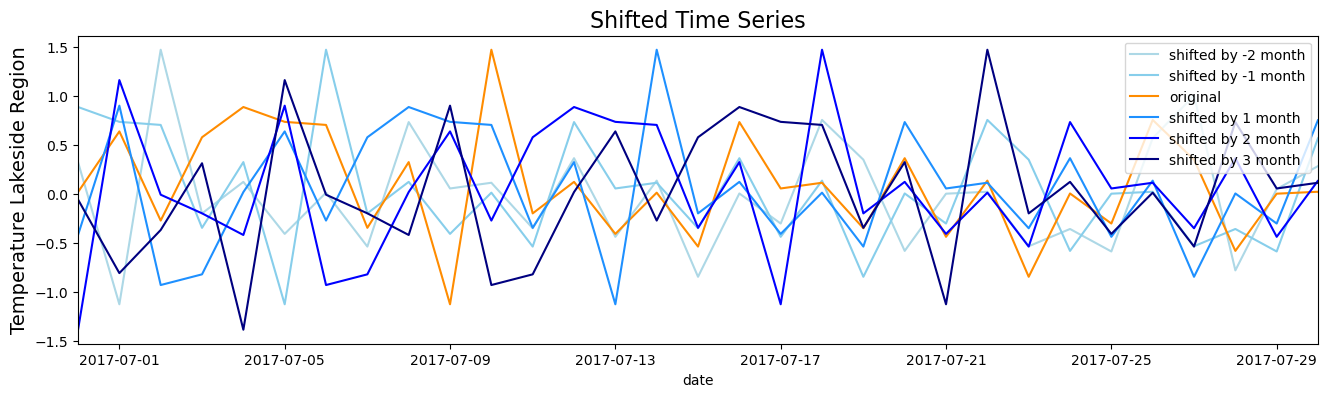

In [52]:
df['drainage_volume_seasonal_shift_r_2M'] = df.drainage_volume_seasonal.shift(-2*weeks_in_month)
df['drainage_volume_seasonal_shift_r_1M'] = df.drainage_volume_seasonal.shift(-1*weeks_in_month)
df['drainage_volume_seasonal_shift_1M'] = df.drainage_volume_seasonal.shift(1*weeks_in_month)
df['drainage_volume_seasonal_shift_2M'] = df.drainage_volume_seasonal.shift(2*weeks_in_month)
df['drainage_volume_seasonal_shift_3M'] = df.drainage_volume_seasonal.shift(3*weeks_in_month)

df['river_hydrometry_seasonal_shift_r_2M'] = df.river_hydrometry_seasonal.shift(-2*weeks_in_month)
df['river_hydrometry_seasonal_shift_r_1M'] = df.river_hydrometry_seasonal.shift(-1*weeks_in_month)
df['river_hydrometry_seasonal_shift_1M'] = df.river_hydrometry_seasonal.shift(1*weeks_in_month)
df['river_hydrometry_seasonal_shift_2M'] = df.river_hydrometry_seasonal.shift(2*weeks_in_month)
df['river_hydrometry_seasonal_shift_3M'] = df.river_hydrometry_seasonal.shift(3*weeks_in_month)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.date, y=df.temperature_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.date, y=df.temperature_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.date, y=df.temperature_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.date, y=df.temperature_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.date, y=df.temperature_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.date, y=df.temperature_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='navy')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2017, 6, 30), date(2017, 7,30)])
ax.set_ylabel(ylabel='Temperature Lakeside Region', fontsize=14)

plt.show()

We carry out some DataViz to gain more insights from our dataset for informed decisions.

In this case, we want to see ithe maximum and minimum seasons/months for each field using seasonal decomposition.

Let's begin by plotting the seasonal components of each feature and comparing the minima and maxima. By doing this, we can already gain some insights:

The depth to groundwater reaches its maximum and its minimum around which months? What about the other fields?

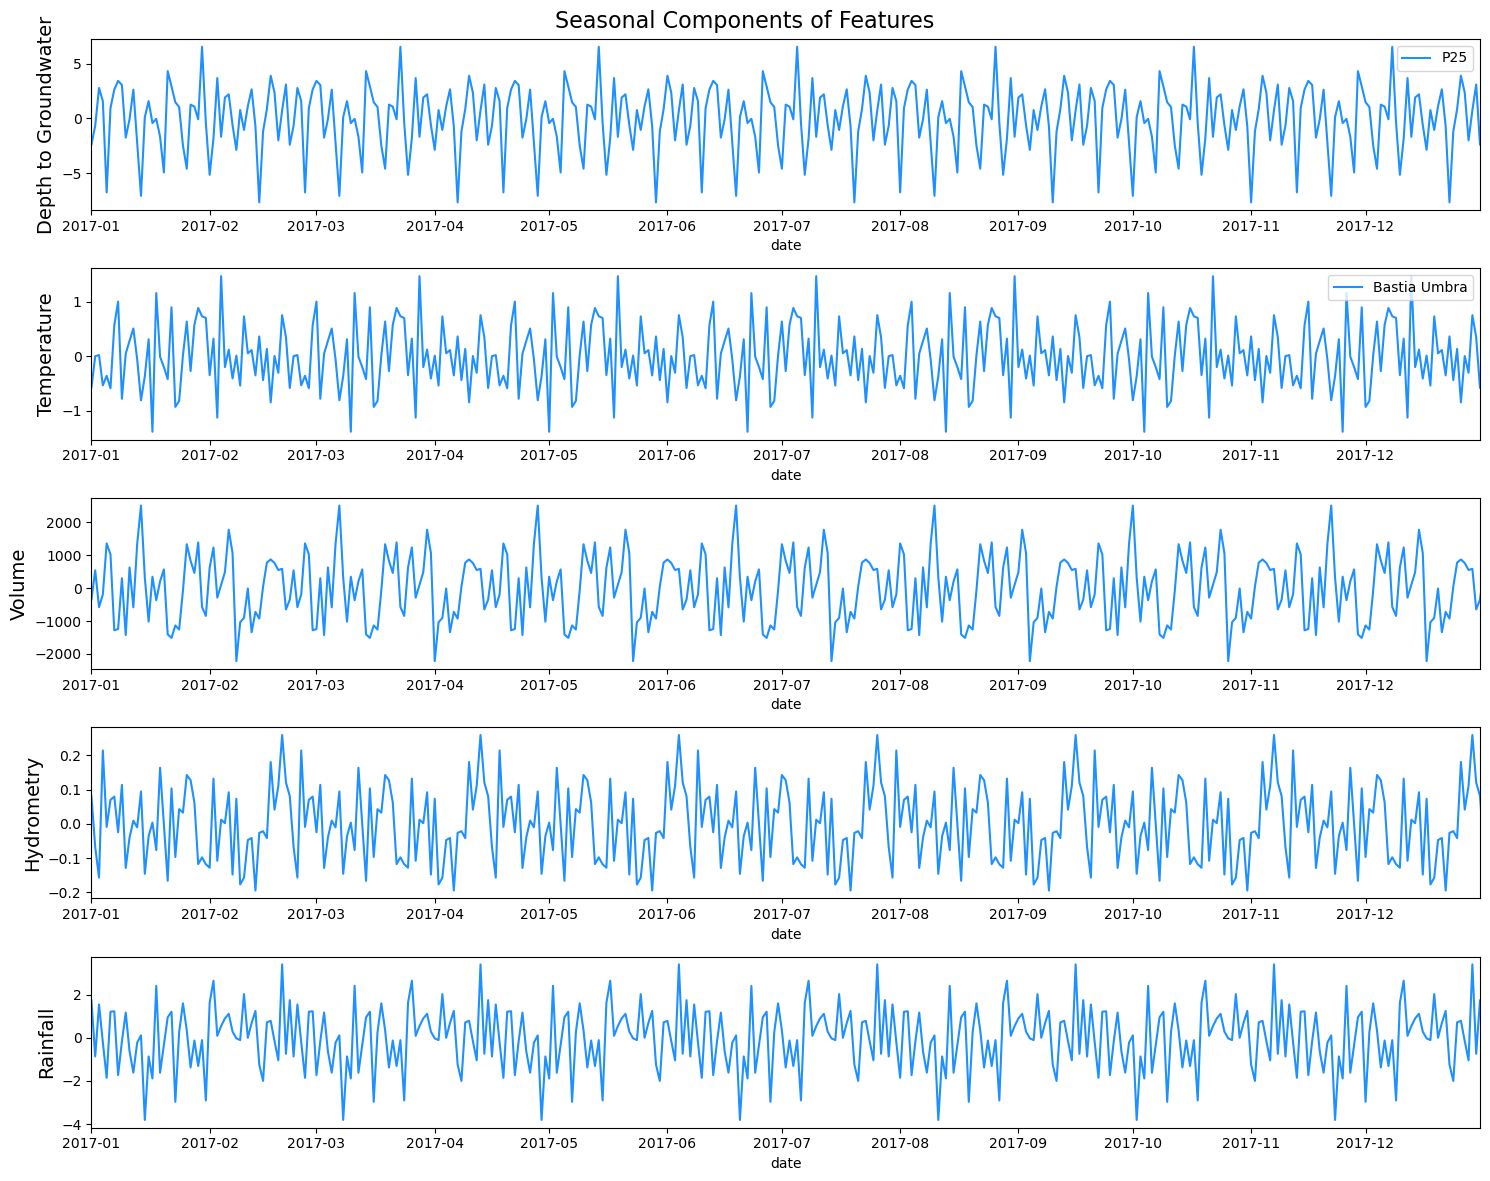

In [54]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.date, y=df.depth_to_groundwater_seasonal, ax=ax[0], color='dodgerblue', label='P25')
ax[0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

sns.lineplot(x=df.date, y=df.temperature_seasonal, ax=ax[1], color='dodgerblue', label='Bastia Umbra')
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df.date, y=df.drainage_volume_seasonal, ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.date, y=df.river_hydrometry_seasonal, ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.date, y=df.rainfall_seasonal, ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='Rainfall', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2017, 1,1), date(2017,12,31)])
plt.tight_layout()
plt.show()

We can also look at the correlation between two continous columns of our dataset, especially the ones showing seasonal trends. Therefore, let us look at correlation among the contonous seasonal columns of our dataset.

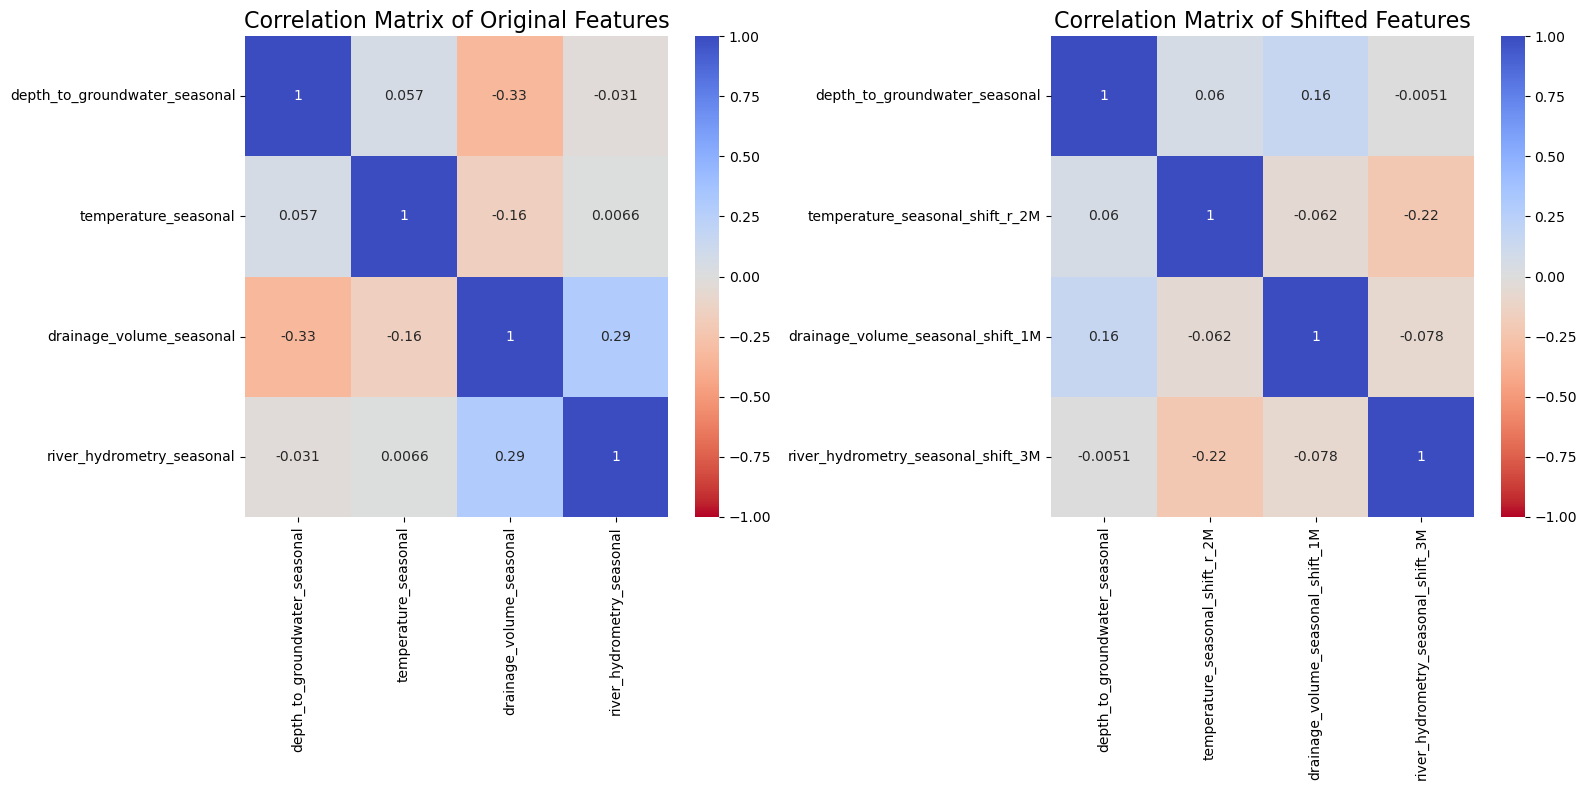

In [55]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

original_cols = ['depth_to_groundwater_seasonal',
                 'temperature_seasonal',
                 'drainage_volume_seasonal', 'river_hydrometry_seasonal']

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Original Features', fontsize=16)

shifted_cols = ['depth_to_groundwater_seasonal',
                'temperature_seasonal_shift_r_2M',
                'drainage_volume_seasonal_shift_1M', 'river_hydrometry_seasonal_shift_3M']
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()


This EDA step is especially important when using ARIMA. The autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

Autocorrelation Function (ACF): Correlation between time series with a lagged version of itself. The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. -> MA parameter is q significant lags Partial Autocorrelation Function (PACF): Additional correlation explained by each successive lagged term -> AR parameter is p significant lags Autocorrelation helps in detecting seasonality.

As we can infer from the graph above, the autocorrelation continues to decrease as the lag increases, confirming that there is no linear association between observations separated by larger lags.

For the AR process, we expect that the ACF plot will gradually decrease and simultaneously the PACF should have a sharp drop after p significant lags. To define a MA process, we expect the opposite from the ACF and PACF plots, meaning that: the ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend.

We will cover this under ARIMA model.

Time Series Application in Machine Learning: Cross Validation.

Cross-validation is the process of splitting the data many times. At each split, part of the data is used for training a model (the training set). The remaining part (validation set) is used to assess the performance of that model. The idea behind cross-validation is to replicate a realistic scenario.

In [56]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.date
y = df.depth_to_groundwater

folds = TimeSeriesSplit(n_splits=N_SPLITS)

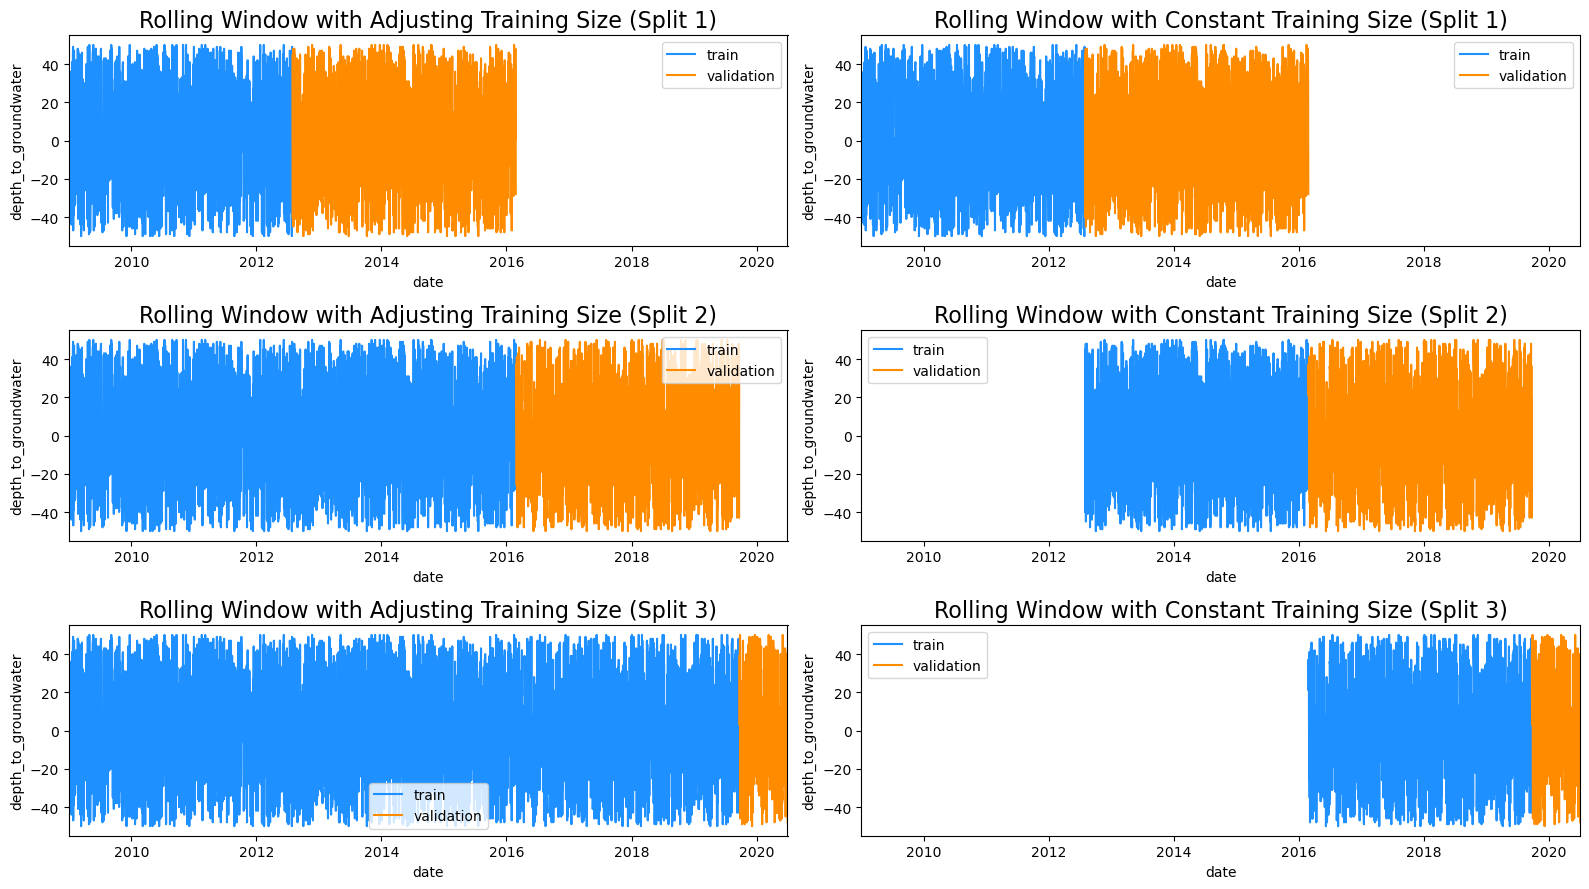

In [76]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

In [61]:
df.tail(10)

date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
5212 2023-04-10  24.92488                  28.0          0.0           3348.0   
5213 2023-04-11  31.00000                  43.0          8.0         -21443.0   
5214 2023-04-12  50.00000                  -6.0          2.0          -7077.0   
5215 2023-04-13  37.00000                 -30.0         -4.0          -6020.0   
5216 2023-04-14  42.00000                   7.0         10.0         -23115.0   
5217 2023-04-15  46.00000                 -44.0         -6.0          -5987.0   
5218 2023-04-16  24.00000                  45.0         10.0           -512.0   
5219 2023-04-17  48.00000                 -15.0          7.0           4689.0   
5220 2023-04-18  10.00000                  -4.0        -10.0         -10045.0   
5221 2023-04-19  14.00000                  27.0         10.0            -56.0   

      river_hydrometry  year  month  day  day_of_year  ...  \
5212               4.0  2023      4   10          100  ...   
5213               4.0  2023      4   11          101  ...   
5214               5.0  2023      4   12          102  ...   
5215               5.0  2023      4   13          103  ...   
5216               3.0  2023      4   14          104  ...   
5217               4.0  2023      4   15          105  ...   
5218               5.0  2023      4   16          106  ...   
5219               2.0  2023      4   17          107  ...   
5220               4.0  2023      4   18          108  ...   
5221               5.0  2023      4   19          109  ...   

      drainage_volume_seasonal_shift_r_2M  \
5212                           625.995404   
5213                          -585.339393   
5214                                  NaN   
5215                                  NaN   
5216                                  NaN   
5217                                  NaN   
5218                                  NaN   
5219                                  NaN   
5220                                  NaN   
5221                                  NaN   

      drainage_volume_seasonal_shift_r_1M  drainage_volume_seasonal_shift_1M  \
5212                         -1282.442922                         583.916337   
5213                         -1242.521626                        -648.285749   
5214                           297.807324                        -352.549716   
5215                         -1427.283375                         538.288755   
5216                           625.995404                        -580.980543   
5217                          -585.339393                        -192.401022   
5218                                  NaN                        1354.746950   
5219                                  NaN                        1023.559240   
5220                                  NaN                       -1282.442922   
5221                                  NaN                       -1242.521626   

      drainage_volume_seasonal_shift_2M  drainage_volume_seasonal_shift_3M  \
5212                         772.796175                       -1340.322177   
5213                         868.242890                        -723.004080   
5214                         760.288520                        -925.416181   
5215                         547.564728                          44.514160   
5216                         583.916337                         772.796175   
5217                        -648.285749                         868.242890   
5218                        -352.549716                         760.288520   
5219                         538.288755                         547.564728   
5220                        -580.980543                         583.916337   
5221                        -192.401022                        -648.285749   

      river_hydrometry_seasonal_shift_r_2M  \
5212                             -0.039339   
5213                              0.009693   
5214                                   NaN   
5215            

Models

Time series can be either univariate or multivariate:

Univariate time series only has a single time-dependent variable.

Multivariate time series have a multiple time-dependent variable.

Our example originally is a multivariate time series because its has multiple features that are all time-dependent. However, by only looking at the target variable Depth to Groundwater we can convert it to a univariate time series.

We will focus on a quarterly forecast. We will use the Q2 2020 as test data and the remaining data will be split by quarter for cross validation.

We will evaluate the Mean Absolute Error (MAE) and the Root Mean Square Error (RMSE) of the models.

For metrics are better the smaller they are.

Models are mostly used for forecasting

•Autoregressive Models (AR): Definition: An autoregressive model represents a linear relationship between the current observation and previous observations, using a weighted sum. Formula: • •AR t =ϕ 1 ⋅Y t−1 +ϕ 2 ⋅Y t−2 +...+ϕ p ⋅Y t−p +ϵ t •Example: Y t =0.8⋅Y t−1 +0.2⋅Y t−2 +ϵ t

•ARMA (AutoRegressive Moving Average): Definition: ARMA combines autoregressive (AR) and moving average (MA) components to model time series data. ARMA(p, q) • •Formula: Y t =ϕ 1 ⋅Y t−1 +ϕ 2 ⋅Y t−2 +...+ϕ p ⋅Y t−p +ϵ t +θ 1 ⋅ϵ t−1 +θ 2 ⋅ϵ t−2 +...+θ q ⋅ϵ t−q •Example: Y t =0.7⋅Y t−1 +ϵ t +0.3⋅ϵ t−1

•Definition: ARIMA combines AR and MA with differencing to handle non-stationary time series data. ARIMA(p, d, q) • •Formula: Y t ′ =ϕ 1 ⋅Y t−1 ′ +ϕ 2 ⋅Y t−2 ′ +...+ϕ p ⋅Y t−p ′ +ϵ t +θ 1 ⋅ϵ t−1 +θ 2 ⋅ϵ t−2 +...+θ q ⋅ϵ t−q • Example: Y t =0.5⋅Y t−1 ′ +ϵ t +0.2⋅ϵ t−1 where Y t ′ =Y t −Y t−1 •

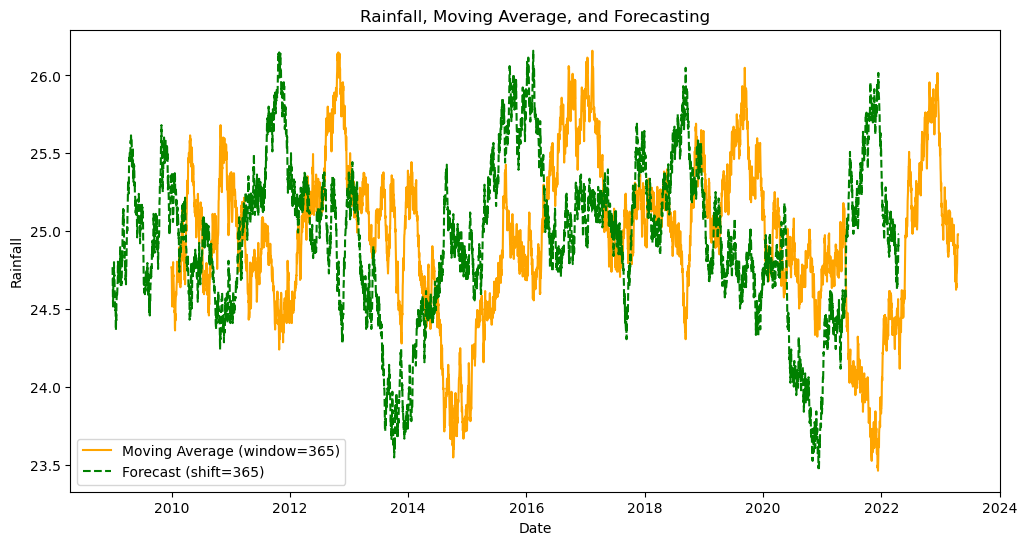

In [62]:
window_size = 365  # You can adjust this window size based on your needs
df['rainfall_MA'] = df['rainfall'].rolling(window=window_size).mean()

# Forecasting (Simplest case: just shift the moving average)
forecast_horizon = 365  # You can adjust this based on your needs
df['rainfall_forecast'] = df['rainfall_MA'].shift(-forecast_horizon)

# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(df['date'], df['rainfall'], label='rainfall', color='blue')
plt.plot(df['date'], df['rainfall_MA'], label=f'Moving Average (window={window_size})', color='orange')
plt.plot(df['date'], df['rainfall_forecast'], label=f'Forecast (shift={forecast_horizon})', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall, Moving Average, and Forecasting')
plt.legend()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Root Mean Squared Error (RMSE): 16.715358968864244


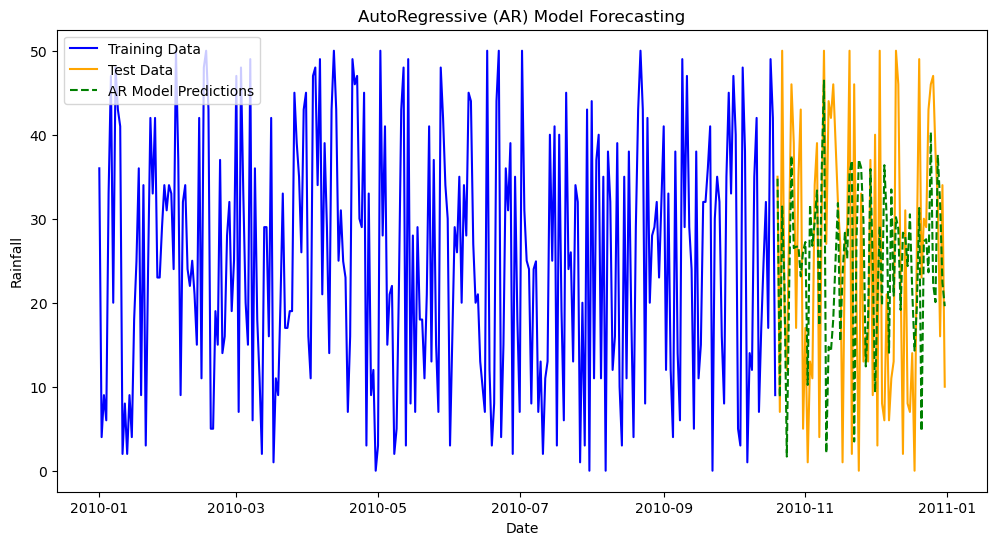

In [63]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
df = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2010-12-31')]
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['rainfall'][:train_size], df['rainfall'][train_size:]

# Fit AutoRegressive model
lag = 90  # Lag order (you can adjust this)
model = AutoReg(train, lags=lag)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting
ax = plt.figure(figsize=(12, 6))
plt.plot(df['date'][:train_size], train, label='Training Data', color='blue')
plt.plot(df['date'][train_size:], test, label='Test Data', color='orange')
plt.plot(df['date'][train_size:], predictions, label='AR Model Predictions', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('AutoRegressive (AR) Model Forecasting')
plt.legend()
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Root Mean Squared Error (RMSE): 15.840738719352027


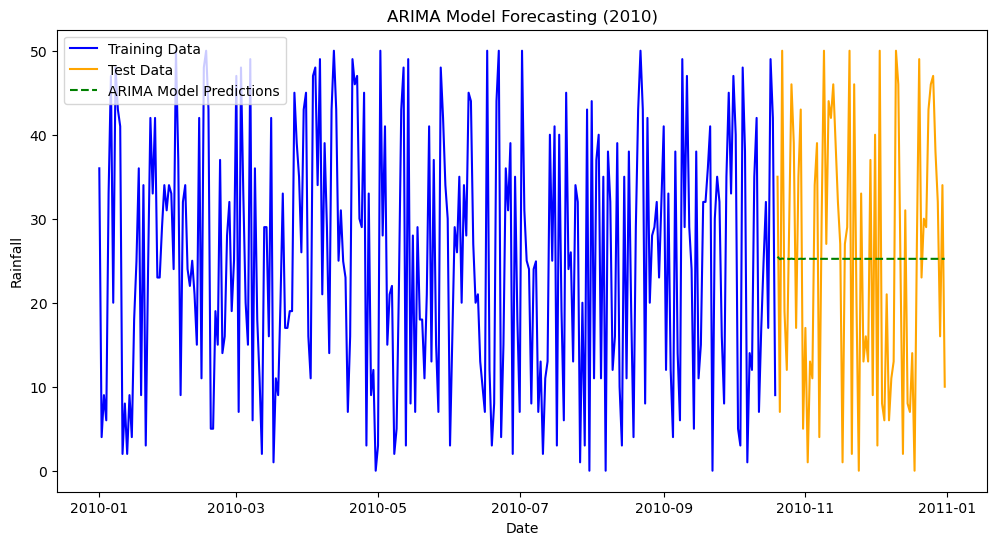

In [64]:
from statsmodels.tsa.arima.model import ARIMA

df = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2010-12-31')]

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['rainfall'][:train_size], df['rainfall'][train_size:]

# Fit ARMA model
order = (2, 1, 2)  # Order of ARMA model (p, d, q) - you can adjust this
model = ARIMA(train, order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='linear')

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(df['date'][:train_size], train, label='Training Data', color='blue')
plt.plot(df['date'][train_size:], test, label='Test Data', color='orange')
plt.plot(df['date'][train_size:], predictions, label='ARIMA Model Predictions', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('ARIMA Model Forecasting (2010)')
plt.legend()
plt.show()

In [65]:
print(len(train))


292
